# 2. Machine Learning for Regression

In [1]:
import numpy as np
import pandas as pd

## 2.2 Data Preparation

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [3]:
# Find the number of rows and columns in the data
df.shape

(11914, 16)

In [4]:
# Convert columns into lower case and replace whitespace with '_'
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
# View data types of columns
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
# Extract columns of 'object' data types
str_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
str_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
# Convert the data of 'str_cols' into lower case and
# replace whitespace with '_'
for col in str_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
# View result
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

## 2.3 Exploratory Data Analysis

In [9]:
# View the column names, their unique values, and
# total number of unique values in each column
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) # display only first 5 unique values
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [10]:
df

make       model  year                engine_fuel_type  engine_hp  \
0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
11913  lincoln      zephyr  2006                regular_unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            manual   rear_wheel_drive              2.0   
1                   6.0            manual   rear_wheel_drive              2.0   
2                   6.0            manual   rear_wheel_drive              2.0   
3                   6.0            manual   rear_wheel_drive              2.0   
4                   6.0            manual   rear_wheel_drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all_wheel_drive              4.0   
11910               6.0         automatic    all_wheel_drive              4.0   
11911               6.0         automatic    all_wheel_drive              4.0   
11912               6.0         automatic    all_wheel_drive              4.0   
11913               6.0         automatic  front_wheel_drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      factory_tuner,luxury,high-performance      compact          coupe   
1                         luxury,performance      compact    convertible   
2                    luxury,high-performance      compact          coupe   
3                         luxury,performance      compact          coupe   
4                                     luxury      compact    convertible   
...                                      ...          ...            ...   
11909             crossover,hatchback,luxury      midsize  4dr_hatchback   
11910             crossover,hatchback,luxury      midsize  4dr_hatchback   
11911             crossover,hatchback,luxury      midsize  4dr_hatchback   
11912             crossover,hatchback,luxury      midsize  4dr_hatchback   
11913                                 luxury      midsize          sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

**Distribution of price**.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

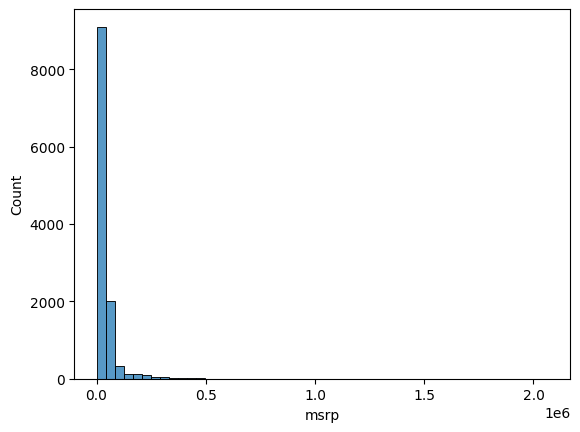

In [12]:
# View the distribution of 'msrp' (bins=50 for zoom in)
sns.histplot(df.msrp, bins=50)
plt.show();

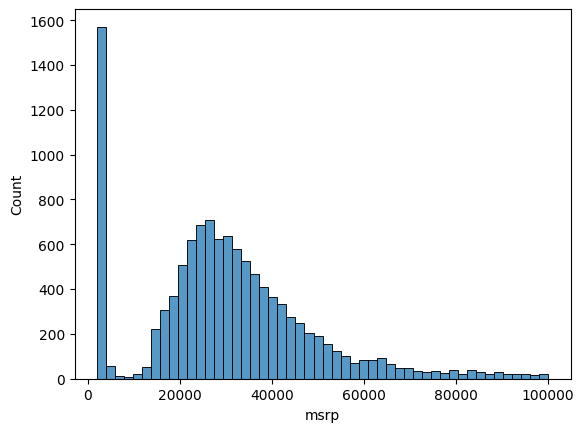

In [13]:
# Extract car price less than 1 hundred thousand
# the distribution is 'long-tail'
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show();

In [14]:
# Define logarithm using 'np.log', note: log of 0 is undefined
# that's why we have to add 1 with each element.
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [15]:
# Another way to calculate logarithm using 'np.log1p'
# the result is same as above
np.log1p([0, 10, 1000, 100000])

array([ 0.        ,  2.39789527,  6.90875478, 11.51293546])

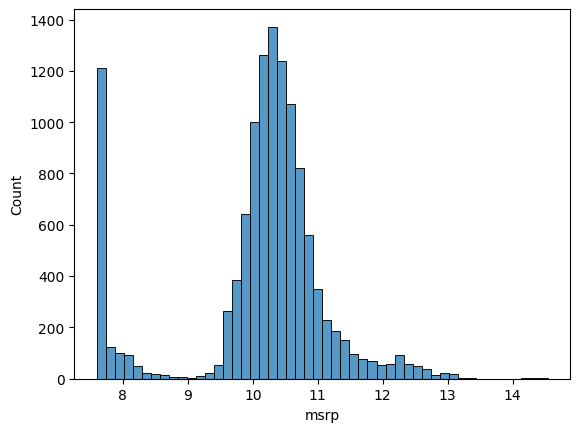

In [16]:
# Remove the effect of 'long-tail' using logarithm transformation
# on 'msrp' and to make normal distribution
price_logs = np.log1p(df.msrp)

# Visualize result
sns.histplot(price_logs, bins=50)
plt.show();

**Find missing values**.

In [17]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting Up the Validation Framework

Let's split the data into train, validation and test sets.

### Segranate the Percentage for Data Split

In [18]:
# Number of rows in the data
n = len(df)

# Split rows into train (60%), val(20%), and test (20%)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [19]:
# Check the ratio of train, val, and test sets
n_train, n_val, n_test

(7150, 2382, 2382)

In [20]:
# Check if the split is done correctly
n, n_train + n_val + n_test

(11914, 11914)

### Split Data into Train, Val, and Test Sets

In [21]:
# Split the 60% data for train, 20% for val, and 20% of test
# note: the split is unshuffled
df_train = df[:n_train]
df_val = df[n_train:n_train+n_val]
df_test = df[n_train+n_val:]

### Shuffle the Data

In [22]:
# Create an array of 'n' index
idx = np.arange(n)

In [23]:
# Set random seed for reproducibility
np.random.seed(2)
np.random.shuffle(idx)

In [24]:
# Shuffle train, val, test datasets
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [25]:
# View results (notice the index is shuffled)
df_train.head()

make    model  year          engine_fuel_type  engine_hp  \
2735    chevrolet   cobalt  2008          regular_unleaded      148.0   
6720       toyota   matrix  2012          regular_unleaded      132.0   
5878       subaru  impreza  2016          regular_unleaded      148.0   
11190  volkswagen  vanagon  1991          regular_unleaded       90.0   
4554         ford    f-150  2017  flex-fuel_(unleaded/e85)      385.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
2735                4.0            manual  front_wheel_drive              2.0   
6720                4.0         automatic  front_wheel_drive              4.0   
5878                4.0         automatic    all_wheel_drive              4.0   
11190               4.0            manual   rear_wheel_drive              3.0   
4554                8.0         automatic   four_wheel_drive              4.0   

      market_category vehicle_size      vehicle_style  highway_mpg  city_mpg  \
2735              NaN      compact              coupe           33        24   
6720        hatchback      compact      4dr_hatchback           32        25   
5878        hatchback      compact      4dr_hatchback           37        28   
11190             NaN        large  passenger_minivan           18        16   
4554        flex_fuel        large    crew_cab_pickup           21        15   

       popularity   msrp  
2735         1385  14410  
6720         2031  19685  
5878          640  19795  
11190         873   2000  
4554         5657  56260

In [26]:
# Count the length of train, val, test for data validation
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

### Reset the Indexes

In [27]:
# Reset indexes in train, val, and test datasets and delete the
# index instead of inserting it back into the df columns using
# 'drop=True'
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
# View results
df_train

make        model  year                engine_fuel_type  \
0       chevrolet       cobalt  2008                regular_unleaded   
1          toyota       matrix  2012                regular_unleaded   
2          subaru      impreza  2016                regular_unleaded   
3      volkswagen      vanagon  1991                regular_unleaded   
4            ford        f-150  2017        flex-fuel_(unleaded/e85)   
...           ...          ...   ...                             ...   
7145          bmw     4_series  2015     premium_unleaded_(required)   
7146   volkswagen       beetle  2015  premium_unleaded_(recommended)   
7147          gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
7148  rolls-royce        ghost  2014     premium_unleaded_(required)   
7149   volkswagen           cc  2017  premium_unleaded_(recommended)   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
7145      300.0               6.0         automatic   rear_wheel_drive   
7146      210.0               4.0  automated_manual  front_wheel_drive   
7147      285.0               6.0         automatic   four_wheel_drive   
7148      563.0              12.0         automatic   rear_wheel_drive   
7149      200.0               4.0  automated_manual  front_wheel_drive   

      number_of_doors            market_category vehicle_size  \
0                 2.0                        NaN      compact   
1                 4.0                  hatchback      compact   
2                 4.0                  hatchback      compact   
3                 3.0                        NaN        large   
4                 4.0                  flex_fuel        large   
...               ...                        ...          ...   
7145              2.0         luxury,performance      midsize   
7146              2.0      hatchback,performance      compact   
7147              4.0                  flex_fuel        large   
7148              4.0  exotic,luxury,performance        large   
7149              4.0                performance      midsize   

            vehicle_style  highway_mpg  city_mpg  popularity    msrp  
0                   coupe           33        24        1385   14410  
1           4dr_hatchback           32        25        2031   19685  
2           4dr_hatchback           37        28         640   19795  
3       passenger_minivan           18        16         873    2000  
4         crew_cab_pickup           21        15        5657   56260  
...                   ...          ...       ...         ...     ...  
7145          convertible           31        20        3916   54900  
7146        2dr_hatchback           30        24         873   29215  
7147  extended_cab_pickup           22        17         549   34675  
7148                sedan           21        13          86  303300  
7149                sedan           31        22         873   37820  

[7150 rows x 16 columns]

### Create "y" Target and Apply Log Transformation

In [29]:
# Create target vector 'y' for train, val, and test sets and
# apply log transformation using 'np.log1p'
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

### Remove Price Column From Train, Val, Test

In [30]:
# Delete 'msrp'
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [31]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

## 2.5 Linear Regression Simple

In [32]:
# Extract the 10th row of train features
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [33]:
# Create function to calculate linear regression
def linear_regression(xi):
    n = len(xi) # num of features in 'xi'
    pred = w0 # bias
    
    for j in range(n):
        # apply simple linear regression formula
        pred = pred + w[j] * xi[j]
    return pred

In [34]:
# Create features list of 'engine_hp', 'city_mpg', and 'popularity'
xi = [355, 15, 549]
w0 = 7.17 # initial prediction (bias)
w = [0.01, 0.04, 0.002] # random weights

In [35]:
# Call linear_regression function
prediction = linear_regression(xi)
prediction

12.418000000000001

In [36]:
# Untransform the prediction from logarithm using 'np.expm1()'
np.expm1(prediction)

247210.61754434957

## 2.6 Linear Regression Vector Form

In [37]:
# Create function to calculate dot product of two vectors
def dot_product(xi, w):
    n = len(xi)
    result = 0.0
    
    for j in range(n):
        result = result + xi[j] * xi[j]
    return result

In [38]:
# Implement 'linear_regression' function
def linear_regression(xi):
    return w0 + dot_product(xi, w)

In [39]:
# Call the function
linear_regression(xi)

427658.17

We can simplify the equation by combining bias `w0` with the weight vector `w` and feature vector `xi`.

Note: When multiplying the bias `w0` with the feature vector `xi`, we always imagine that $w_0$ is $w_{0}^{x_{i0}}$ ($where\ x_{i0} = 1\ for\ w_0$)

In [40]:
w0 = 7.17 # bias
w = [0.01, 0.04, 0.002] # weight

# Prepend bias with weight
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [41]:
# Simplify linear regression function by including
# bias in the 'dot_product' function
def linear_regression(xi):
    xi = [1] + xi # add bias on feature vector
    return dot_product(xi, w_new)

In [42]:
# Function call
linear_regression(xi)

427652.0

Now we have the understanding about feature vector and weights vector multiplication. We can apply this methodology on whole matrix `X`.

In [43]:
# Create a matrix 'X' of three rows
# note: add bias=1 on each feature vector
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

# Make the above features as numpy array
X = np.array([x1, x2, x3])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

Now we can simplify our `linear_regression()` function even more, which can be writtern as followed:

In [44]:
def linear_regression(X):
    return X.dot(w_new) # using numpy `dot()` function

In [45]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a Linear Regression Model

In section `2.6` we learned how to apply model to make predictions. In this section we'll learn how do we find out the weights to train the model for predictions for linear regression.

In [46]:
# Create a feature matrix 'X' and convert it to numpy array
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [47]:
# View the shape of 'X'
X.shape

(9, 3)

We know that our matrix `X` has bias (equals to `1`) multiplied in each row. Let's add the bias using `np.column_stack()` function.

In [48]:
# Create an array of ones with equal number of rows in 'X'
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [49]:
# Stack the 'ones' with 'X'
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

NumPy is showing the values in a smarter way because they are quite big. We can use `tolist()` function to view the values in more readable format.

In [50]:
X.tolist()

[[1.0, 148.0, 24.0, 1385.0],
 [1.0, 132.0, 25.0, 2031.0],
 [1.0, 453.0, 11.0, 86.0],
 [1.0, 158.0, 24.0, 185.0],
 [1.0, 172.0, 25.0, 201.0],
 [1.0, 413.0, 11.0, 86.0],
 [1.0, 38.0, 54.0, 185.0],
 [1.0, 142.0, 25.0, 431.0],
 [1.0, 453.0, 31.0, 86.0]]

Lets create a target vector `y` which is equal to the number of rows in `X`.

In [51]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

# Convert 'y' to an array
y = np.array(y)
y

array([10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000])

The inverse of feature matrix `X` is not possible because it is not square. Therefore we'll have to calculate the `Gram matrix` which is the dot product of $X^T$ and $X$, doing so, we'll able to find the inverse of Gram matrix.

In [52]:
# Calculate X.T and X using numpy 'dot()' function
XTX = X.T.dot(X)

# Calculation inverse of 'XTX'
XTX_inv = np.linalg.inv(XTX)

We have the inverse matrix `XTX` which we'll help us to find the weights (coefficients) being used to make predictions.

We can find out the weights by taking dot product of `XTX_inv` with `X.T` and then calculating the dot product with the target vector `y`.

In [53]:
# Find coefficients
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

We know that the first element in our vector `w_full` is bias and rest of the elements are weights. We can separate them:

In [54]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(25844.75405576687, array([ -16.08906468, -199.47254894,   -1.22802883]))

Let's create a function `train_linear_regession()` that takes feature matrix `X` and target vector `y` and returns the weights and bias used to train the model.

In [55]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

To avoid `LinAlgError: Singular matrix`, lets create a new feature matrix `Xnew`.

In [56]:
X = [[148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86]]

Xnew = np.array(X)
Xnew

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [57]:
# Call 'train_linear_regression'
train_linear_regression(Xnew, y)

(25844.75405576687, array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car Price Baseline Model

Now we'll build our baseline model by training only on the numeric columns like `engine_hp`, `engine_cylinders`, `highway_mpg`, `city_mpg`, `popularity`.

In [58]:
# Check columns data type
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [59]:
# Make a list of numerical columns from 'df_train'
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

# Make a subset of 'df_train' and assign it to 'X_train'
X_train = df_train[base]
X_train.head()

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0      148.0               4.0           33        24        1385
1      132.0               4.0           32        25        2031
2      148.0               4.0           37        28         640
3       90.0               4.0           18        16         873
4      385.0               8.0           21        15        5657

Let's find the missing values in `X_train` and replace the values with `0` using `fillna()` function.  Also, convert the values of X_train to numpy array using `.values` attribute.

In [60]:
# Check columns with missing values
X_train.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [61]:
# Replace missing values with '0'
# and convert dataframe to numpy array
X_train = X_train.fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

Let's build a baseline model using `train_linear_regression()`, that takes feature matrix `X_train` and target vector `y_train` and return coefficients (bias and weights).

In [62]:
# Apply 'train_linear_regression()' function
w0, w = train_linear_regression(X_train, y_train)

# View bias and weights
print(w0)
print(w)

7.927257388069938
[ 9.70589522e-03 -1.59103494e-01  1.43792133e-02  1.49441072e-02
 -9.06908672e-06]


Now we know the `w0` and `w`, we can use them to make predictions `y_pred` in the following way:

In [63]:
# Make predictions
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

Let's visualize and compare `y_train` and `y_pred`.

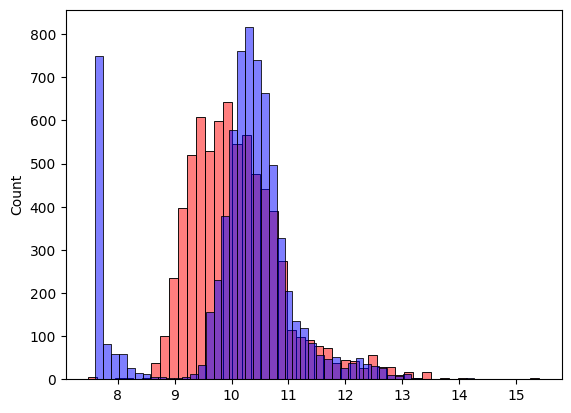

In [64]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
plt.show();

## 2.9 RMSE

We can interpret the results of our model and measure the accuracy of our model (good or bad) using RMSE.

The formula of the Root Mean Squared Error will be written as: $RMSE = \sqrt{\frac{1}{m}\Sigma_{i=1}^{m}{\Big({g(x_i) - y_i)}\Big)^2}}$

Let's see how we can write it in Python.

In [65]:
# Write a function to calculation RMSE to measure the quality
# of our model
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [66]:
# find rmse of our model
rmse(y_train, y_pred)

0.7554192603920133

## 2.10 Validating the Model

Instead the training the model and then evaluating the performance of the model on `y_train`, we should evaluate the model on the **validation data**.

First, to avoid doing repetitive tasks, we'll create of function `prepare_X()` that takes of a dataframe and perform the following:

- filter `df` to extract only numeric columns and make a new subset of the dataframe
- fill missing values with `0`
- create feature matrix `X` and convert into numpy array

In [67]:
def prepare_X(df):
    df_num = df[base] # we already have defined base (i.e, numeric cols)
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Now we have the function to prepare the data, let's apply it on `df_train` and `df_val`.

In [68]:
# Apply 'prepare_X()' function to create 'X_train'
X_train = prepare_X(df_train)
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [69]:
# Apply 'prepare_X()' function to create 'X_train'
X_val = prepare_X(df_val)
X_val

array([[2.000e+02, 4.000e+00, 2.500e+01, 1.900e+01, 1.385e+03],
       [2.410e+02, 4.000e+00, 2.900e+01, 2.200e+01, 6.170e+02],
       [1.600e+02, 4.000e+00, 3.600e+01, 2.600e+01, 5.657e+03],
       ...,
       [3.320e+02, 8.000e+00, 2.300e+01, 2.000e+01, 1.624e+03],
       [1.480e+02, 4.000e+00, 3.400e+01, 2.400e+01, 4.360e+02],
       [2.900e+02, 6.000e+00, 2.500e+01, 1.800e+01, 1.720e+03]])

Next, we'll train our model using `train_linear_regression()` to find bias and weights.

In [70]:
w0, w = train_linear_regression(X_train, y_train)
print(w0)
print(w)

7.927257388069938
[ 9.70589522e-03 -1.59103494e-01  1.43792133e-02  1.49441072e-02
 -9.06908672e-06]


Now we'll use these coefficients on `X_val` to make predictions and calculation the rmse to evaluate the model accuracy.

In [71]:
# Make predictions on 'X_val'
y_pred = w0 + X_val.dot(w)
y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

In [72]:
# Compute rmse on 'y_val' and 'y_pred'
rmse(y_val, y_pred)

0.7616530991301607

## 2.11 Simple Freature Engineering

Feature engineering is the process of creating new features. In our `df` dataset we have an important feature `year` which we can use to calculate the age of a car. Age has the influence on a cars price; the older the car is, the cheaper is the price.

Let's modify our function `prepare_X()` a little bit, which will take the dataframe and prepare the following new things in addition:

- make a new copy of the `df`
- calculate the age of the car (i.e., max year - year), and create new column by the name `age`
- add the new feature `age` with the rest of the numeric columns we already have (`base`)

In [73]:
# Modify the 'prepare_X()' function
def prepare_X(df):
    df = df.copy()
    df['age'] = df['year'].max() - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Now lets perform all the tasks we have done previously, such as:
- prepare data for X_train and X_val
- train model on train dataset
- make predictions on X_val
- calculate rmse using y_val and y_pred

In [74]:
# Prepare X_train and X_val
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [75]:
# Train the model
w0, w = train_linear_regression(X_train, y_train)

# Make predictions
y_pred = w0 + X_val.dot(w)

# Calculate rmse
rmse(y_val, y_pred)

0.5172055461058338

We can see a significant improvement in our model just by adding one extra feature. Let's visualize and compare the results on `y_val` and `y_pred`.

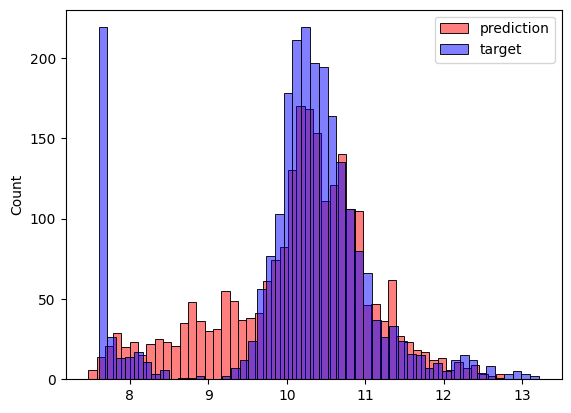

In [76]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=50)
plt.legend() # display legend
plt.show();

## 2.12 Categorical Variables

Now we'll include categorical variables along with numerical variables to train and evaluate our model. 

Let's see the categorical variables in our data.

In [77]:
# View the data types in the 'df_train'
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

There are seven categorical columns in our data, they are `make`, `model`, `engine_fuel_type`, `driven_wheels`, `market_category`, `vehicle_size`, and `vehicle_style`.
*Note*: We are not including `transmission_type` column in our data.

Another thing if we look closely, the column `number_of_doors` is also categorical, however, Pandas represents it as numerical. We'll also inculde it in our categorical columns.

Now we know our columns for model training and evaluation, we'll modify function `prepare_X()` even further and the new steps will be as follow:

- create a dict of list of store categorical column name as key and their top-5 frequent index as values
- turn `number_of_doors` column as One-Hot encode
- create new columns `name_value` from categorical dictionary

Before modifying the `prepare_X()` function, we begin with by defining a list of categorical columns and store their top-5 index names in the dictionary `categorical_dict`.

In [78]:
# Create a list of categorical columns (exclude 'transmission_type')
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style']

# create an empty dict to store col name as key and its
# top-5 most freq index
categorical_dict = {}

# loop over 'categorical_columns' to store key names and
# a list of index names
for c in categorical_columns:
    categorical_dict[c] = df[c].value_counts().head().index.tolist()

In [79]:
# Modify the 'prepare_X()' function
def prepare_X(df):
    df = df.copy()
    df['age'] = df['year'].max() - df['year']
    features = base + ['age']
    
    # create one-hot encode for 'number_of_doors' column
    for v in [2, 3, 4]: # values in the column
        df['num_doors_%d' % v] = (df['number_of_doors'] == v).astype(int) # convert 'bool' to 'integer', True=1 and False=0
        features.append('num_doors_%d' % v)
    
    # create 'name_value' columns from 'categorical_dict'
    for name, values in categorical_dict.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int) # convert bool -> integer
            features.append('%s_%s' %(name, value))
            
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Now we'll apply prepare_X function on `df_train` and `df_val` data to create `X_train` and `X_val`.

In [80]:
# Create X_train and X_val
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [81]:
# Train the model
w0, w = train_linear_regression(X_train, y_train)

In [82]:
# Make predictions
y_pred = w0 + X_val.dot(w)

# Evaluate the model
rmse(y_val, y_pred)

27.265674433346764

## 2.13 Regularization

If we apply the normal linear regression equation with the feature matrix, the values associated with duplicated columns become very large and which decrease the model performance.

To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

Let's implement this phenomena on a dummy data and see the difference.

In [83]:
# Create an array X with duplicated columns also
# add some noise in the data to avoid 'Singular matrix' error
X = np.array([
            [4, 4, 4],
            [3, 5, 5],
            [5, 1, 1],
            [5, 4.00000002, 4],
            [7, 5, 5],
            [4, 5, 5.00000001]])

X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.00000002, 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [84]:
# Create target vector y
y = np.array([1, 2, 3, 1, 2, 3])
y

array([1, 2, 3, 1, 2, 3])

In [85]:
# Calculate Gram matrix
XTX = X.T.dot(X)
XTX

array([[140.        , 111.0000001 , 111.00000004],
       [111.0000001 , 108.00000016, 108.00000013],
       [111.00000004, 108.00000013, 108.0000001 ]])

In [86]:
# Calculate inverse of XTX
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.84960850e-02,  7.91930571e+04, -7.91931000e+04],
       [ 7.91930620e+04, -7.03687442e+13,  7.03687442e+13],
       [-7.91931016e+04,  7.03687442e+13, -7.03687441e+13]])

Now let's make predictions using **normal equation**.

In [87]:
# Make predictions on 'y'
XTX_inv.dot(X.T).dot(y)

array([ 1.83560258e-01,  2.29358355e+06, -2.29358325e+06])

We see these numbers are very large but we can control them by adding small numbers on the diagonal of the feature matrix.

Let's perform all the above tasks on the small feature matrix `Xnew` (to understand it easily) and also add the number on the diagonal of the feature matrix to observe the change.

In [88]:
# Create feature matrix 'Xnew' and add some noise as well in 
# duplicate columns
Xnew = np.array([[1, 2, 2],
                [2, 1, 1.0000001],
                [2, 1.0000001, 1]])
Xnew

array([[1.       , 2.       , 2.       ],
       [2.       , 1.       , 1.0000001],
       [2.       , 1.0000001, 1.       ]])

In [89]:
# Make target vector 'ynew'
ynew = np.array([1, 2, 3])
ynew

array([1, 2, 3])

In [90]:
# Calculate Gram matrix
XTXnew = Xnew.T.dot(Xnew)
XTXnew

array([[9.       , 6.0000002, 6.0000002],
       [6.0000002, 6.0000002, 6.0000002],
       [6.0000002, 6.0000002, 6.0000002]])

Next, we add the small numbers in the diagonal usng `np.eye()` and also multiply them with a small number `0.01` (a.k.a regularizer).

In [91]:
# Add number to the diagonal of the 'Xnew' and multiply them with
# some regularizer
XTXnew = XTXnew + 0.01 * np.eye(XTXnew.shape[0]) # shape is the num of rows Xnew (i.e., 3)
XTXnew

array([[9.01     , 6.0000002, 6.0000002],
       [6.0000002, 6.0100002, 6.0000002],
       [6.0000002, 6.0000002, 6.0100002]])

In [92]:
# Calculate inverse
XTXnew_inv = np.linalg.inv(XTXnew)
XTXnew_inv

array([[  0.33167544,  -0.16569964,  -0.16569964],
       [ -0.16569964,  50.12441281, -49.87558719],
       [ -0.16569964, -49.87558719,  50.12441281]])

In [93]:
# Make predictions
XTXnew_inv.dot(Xnew.T).dot(ynew)

array([ 1.32863483, -0.08091165, -0.08092165])

We see that just by adding small numbers to the diagonal can make the difference.

Let's apply this on the train data to train the model and then evaluate on the validation data. For that, we'll modify our `train_linear_regression()` function, where we'll introduce adding numbers to the diagonal.

In [94]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X) # dot of X.T and X
    XTX = XTX + r * np.eye(XTX.shape[0]) # r is a hyper parameter
    
    XTX_inv = np.linalg.inv(XTX) # inverse of XTX
    w_full = XTX_inv.dot(X.T).dot(y) # make predictions to get weights
    
    return w_full[0], w_full[1:] # separate bias (w_full[0]) and weights (w_full[1:])

Next we'll prepare the train and validation data using `prepare_X()`.

In [95]:
# Train data
X_train = prepare_X(df_train)

# Validation data
X_val = prepare_X(df_val)

Train the model using our modified function `train_linear_regression_reg()` and using the regularizer `r=0.01` instead of default value.

In [96]:
# Train the model to find bias and weigths
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

Make predictions on `X_val` and compute rmse using `y_val` and `y_pred`.

In [97]:
# Make predictions
y_pred = w0 + X_val.dot(w)

# Evaluate the model
rmse(y_val, y_pred)

0.4605844623949912

We notice drastic improvement in the model performance just by controlling the weights of our feature matrix.

## 2.14 Tuning the Model

The model tuning is the process of finding the best value for our regularizer `r` to train our model and to get optimal score.

Let's apply various `r` values and compare the results:

In [98]:
# Loop over different value of 'r' and find the best rmse score
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    # prepare data
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    
    # train the model
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)    
    # make predictions
    y_pred = w0 + X_val.dot(w)
    # calculate rmse
    score = rmse(y_val, y_pred)
    print(f'Regularizer: {r}, Bias: {w0}, Score: {score}', '\n')

Regularizer: 0.0, Bias: -275712500785850.2, Score: 27.265674433346764 

Regularizer: 1e-05, Bias: 6.414467560337749, Score: 0.46057831399442706 

Regularizer: 0.0001, Bias: 7.1065696630573925, Score: 0.4605783841265944 

Regularizer: 0.001, Bias: 7.104771232272828, Score: 0.46057893069042044 

Regularizer: 0.1, Bias: 6.975550295764476, Score: 0.460642592982 

Regularizer: 1, Bias: 6.2337235287224715, Score: 0.4613844186131938 

Regularizer: 10, Bias: 4.726029506763395, Score: 0.47244686870533115 



We see there is not much of a difference when the `r` is **0.0001** or **0.001**. We'll choose `r=0.001` to train our model because it gives us slight better results in term of bias and the score.

In [99]:
# Train the model using 'r=0.001'
r = 0.001
# prepare data
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

# train the model
w0, w = train_linear_regression_reg(X_train, y_train, r=r)    
# make predictions
y_pred = w0 + X_val.dot(w)
# calculate rmse
score = rmse(y_val, y_pred)
score

0.46057893069042044

## 2.15 Using the Model on Test Data

Now that we know the optimal parameters for the model evaluation on the validation data, we'll combine the train and validation data for the final training of the model and evaluate the rmse score on the test data.

In [100]:
# Concat the train and validation data
df_full_train = pd.concat([df_train, df_val])
df_full_train

make                    model  year             engine_fuel_type  \
0      chevrolet                   cobalt  2008             regular_unleaded   
1         toyota                   matrix  2012             regular_unleaded   
2         subaru                  impreza  2016             regular_unleaded   
3     volkswagen                  vanagon  1991             regular_unleaded   
4           ford                    f-150  2017     flex-fuel_(unleaded/e85)   
...          ...                      ...   ...                          ...   
2377       volvo                      v60  2015             regular_unleaded   
2378    maserati  granturismo_convertible  2015  premium_unleaded_(required)   
2379    cadillac          escalade_hybrid  2013             regular_unleaded   
2380  mitsubishi                   lancer  2016             regular_unleaded   
2381         kia                  sorento  2015             regular_unleaded   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
2377      240.0               4.0         automatic  front_wheel_drive   
2378      444.0               8.0         automatic   rear_wheel_drive   
2379      332.0               8.0         automatic   rear_wheel_drive   
2380      148.0               4.0            manual  front_wheel_drive   
2381      290.0               6.0         automatic  front_wheel_drive   

      number_of_doors                 market_category vehicle_size  \
0                 2.0                             NaN      compact   
1                 4.0                       hatchback      compact   
2                 4.0                       hatchback      compact   
3                 3.0                             NaN        large   
4                 4.0                       flex_fuel        large   
...               ...                             ...          ...   
2377              4.0                          luxury      midsize   
2378              2.0  exotic,luxury,high-performance      midsize   
2379              4.0                   luxury,hybrid        large   
2380              4.0                             NaN      compact   
2381              4.0                       crossover      midsize   

          vehicle_style  highway_mpg  city_mpg  popularity  
0                 coupe           33        24        1385  
1         4dr_hatchback           32        25        2031  
2         4dr_hatchback           37        28         640  
3     passenger_minivan           18        16         873  
4       crew_cab_pickup           21        15        5657  
...                 ...          ...       ...         ...  
2377              wagon           37        25         870  
2378        convertible           20        13         238  
2379            4dr_suv           23        20        1624  
2380              sedan           34        24         436  
2381            4dr_suv           25        18        1720  

[9532 rows x 15 columns]

In [101]:
# Reset the index to make it sequential
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

make                    model  year             engine_fuel_type  \
0      chevrolet                   cobalt  2008             regular_unleaded   
1         toyota                   matrix  2012             regular_unleaded   
2         subaru                  impreza  2016             regular_unleaded   
3     volkswagen                  vanagon  1991             regular_unleaded   
4           ford                    f-150  2017     flex-fuel_(unleaded/e85)   
...          ...                      ...   ...                          ...   
9527       volvo                      v60  2015             regular_unleaded   
9528    maserati  granturismo_convertible  2015  premium_unleaded_(required)   
9529    cadillac          escalade_hybrid  2013             regular_unleaded   
9530  mitsubishi                   lancer  2016             regular_unleaded   
9531         kia                  sorento  2015             regular_unleaded   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
9527      240.0               4.0         automatic  front_wheel_drive   
9528      444.0               8.0         automatic   rear_wheel_drive   
9529      332.0               8.0         automatic   rear_wheel_drive   
9530      148.0               4.0            manual  front_wheel_drive   
9531      290.0               6.0         automatic  front_wheel_drive   

      number_of_doors                 market_category vehicle_size  \
0                 2.0                             NaN      compact   
1                 4.0                       hatchback      compact   
2                 4.0                       hatchback      compact   
3                 3.0                             NaN        large   
4                 4.0                       flex_fuel        large   
...               ...                             ...          ...   
9527              4.0                          luxury      midsize   
9528              2.0  exotic,luxury,high-performance      midsize   
9529              4.0                   luxury,hybrid        large   
9530              4.0                             NaN      compact   
9531              4.0                       crossover      midsize   

          vehicle_style  highway_mpg  city_mpg  popularity  
0                 coupe           33        24        1385  
1         4dr_hatchback           32        25        2031  
2         4dr_hatchback           37        28         640  
3     passenger_minivan           18        16         873  
4       crew_cab_pickup           21        15        5657  
...                 ...          ...       ...         ...  
9527              wagon           37        25         870  
9528        convertible           20        13         238  
9529            4dr_suv           23        20        1624  
9530              sedan           34        24         436  
9531            4dr_suv           25        18        1720  

[9532 rows x 15 columns]

In [102]:
# Prepare train data using 'prepare_X()'
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [103]:
# Concat train and validation target vectors
# using 'np.concatenate()'
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [104]:
# Train the model using 'X_full_train' data (set r=0.001)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [105]:
# Prepare test data
X_test = prepare_X(df_test)

# Make prediction on test data
y_pred = w0 + X_test.dot(w)

# Calculate rmse score on y_test
score = rmse(y_test, y_pred)
score

0.4599149702222068

We have trained our model on `train + valation` dataset and evaluated on the `test` data. Its time to make prediction on new car.

Normally, when we get request from the server to make predictions, we get it in dictionary format where the keys are the feature names and values are the corresponding values.

Therefore, we need to do some preprocessing the make the data available for model prediction.

Let's use the test data for the demonstration. Because the model was not trained on the test data, that's why it is fine to use test data for this purpose.

In [106]:
# Extract row 20 from the test data and convert it to dictionary
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

Because our function `prepare_X()` expects `dataframe` as its parameter, we'll have to convert the dictionary `car` to the right format.

In [107]:
# Convert car from dict to dataframe
df_small = pd.DataFrame([car])
df_small

make   model  year  engine_fuel_type  engine_hp  engine_cylinders  \
0  toyota  sienna  2015  regular_unleaded      266.0               6.0   

  transmission_type      driven_wheels  number_of_doors  market_category  \
0         automatic  front_wheel_drive              4.0              NaN   

  vehicle_size      vehicle_style  highway_mpg  city_mpg  popularity  
0        large  passenger_minivan           25        18        2031

In [108]:
# Prepare the data
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [109]:
# Make predictions using our trained weights (i.e. w0 and w)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0] # we are just interested in the actual value
y_pred

10.778696964142995

Our prediction is in logarithm format. To untransform the prediction we'll use `np.expm1()` function.

In [110]:
# Untransform the predictions to interpret
np.expm1(y_pred)

47986.55397799914

Our model prediction the car price of `Toyota Sienna` is `$47,986`. Let's compare it with the actual price of Toyota Sienna.

In [111]:
# Untransform the actual price of the car in row 20
np.expm1(y_test[20])

35000.00000000001

There is quite a significant difference between the actual car price `$35,000` and what our model thinks the price should be `$47,986`. We know that our model is learning the patterns in the data but there's a room of improvement which we need to consider.

## 2.16 Project Summary

The topics we covered in this project are:

- Data preparation
- Exploratory data analysis
- The validation framework
- Linear regression model
- Linear regression; vector and normal forms
- The baseline model
- Root mean squared error
- Feature engineering
- Regularization
- Tuning the model
- Using the best model with new data

## 2.17 Next Step

- We included only 5 top features. What happens if we include 10?

Other projects:

- [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) - predict the price of a house
- [Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance) - predict the performance of students
- UCI ML Repository contains a lot of other datasets suitable for practicing regression - https://archive.ics.uci.edu/ml/datasets.php?task=reg